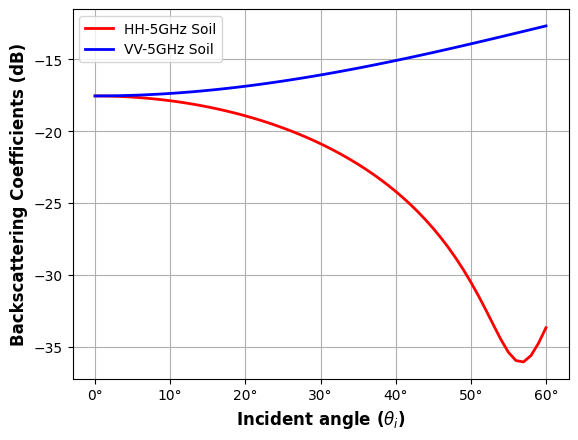

In [11]:
import numpy as np
from collections import defaultdict
from ssrt import S2RTR
from aiem import AIEM
import matplotlib.pyplot as plt


# Set the bacscattering models
RT_models = {
    'RT_s': 'AIEM', # options: 'AIEM', 'PRISM1'
    'RT_c': 'Diff' # options: 'Diffuse', 'Specular'
    }

# Radar parameters
frqs = [1, ]
thetas = np.arange(0.00001, 61, 1)
phi_i = 0.
phi_s = 179.999

# Vegetation parameters
eps2 = 2+0.*1j # Canopy
a = 0.1
kappa_e = 1.
d = 0.1

# Soil parameters
eps3 = 5.1+1.*1j # Soil
s = 0.01
cl = 0.041
acftype = 'gauss' # options: 'exp', 'gauss', 'pow'

# Initialize defaultdicts to store the results
HH_s = defaultdict(list)
VV_s = defaultdict(list)
HV_s = defaultdict(list)
VH_s = defaultdict(list)

HH_c = defaultdict(list)
VV_c = defaultdict(list)
HV_c = defaultdict(list)
VH_c = defaultdict(list)


pol_list = ['vv', 'hh', 'hv', 'vh']

# Loop over the angles
for f in frqs:
    for theta_i in thetas:
        theta_s = theta_i

        # Create an instance of the S2RTR class
        rt = S2RTR(
            frq_GHz=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, 
            s=s, cl=cl, eps2=eps2, eps3=eps3, a=a, kappa_e=kappa_e, d=d, acftype=acftype, RT_models=RT_models)
        # Calculate backscattering coefficients
        sig_a, sig_s, sig_c = rt.calc_sigma(todB=True)

        # aiem0 = AIEM(
        #             frq_ghz=f, theta_i=theta_i, theta_s=theta_s, phi_i=phi_i, phi_s=phi_s, 
        #             sigma=s, cl=cl, eps=eps3, acf_type=acftype)
        # sig_s_full = aiem0.run(todB=True)
        # sig_s = dict(zip(pol_list, sig_s_full))

        # Store the results in the defaultdicts
        HH_s[f].append(sig_s['hh'])
        VV_s[f].append(sig_s['vv'])
        HV_s[f].append(sig_s['hv'])
        VH_s[f].append(sig_s['vh'])

        HH_c[f].append(sig_c['hh'])
        VV_c[f].append(sig_c['vv'])
        HV_c[f].append(sig_c['hv'])
        VH_c[f].append(sig_c['vh'])


# Plotting results
plt.figure(2)
# Plotting HH and VV for each itype
plt.plot(thetas, HH_s[1], color='r', linewidth=2, label='HH-5GHz Soil')
plt.plot(thetas, VV_s[1], color='b', linewidth=2, label='VV-5GHz Soil')

# plt.plot(thetas, HH_c[1], color='m', linewidth=2, label='HH-5GHz Veg', linestyle='--')
# plt.plot(thetas, VV_c[1], color='m', linewidth=2, label='VV-5GHz Veg', linestyle='--')


# plt.plot(thetas, HH_s[3], color='b', linewidth=2, label='HH-3GHz Soil', linestyle='--')
# plt.plot(thetas, VV_s[3], color='b', linewidth=2, label='VV-3GHz Soil')

# plt.plot(thetas, HH_c[5], color='g', linewidth=2, label='HH-5GHz Veg', linestyle='--')
# plt.plot(thetas, VV_c[5], color='g', linewidth=2, label='VV-5GHz Veg')

# plt.plot(thetas, HH_c[3], color='c', linewidth=2, label='HH-3GHz Veg', linestyle='--')
# plt.plot(thetas, VV_c[3], color='c', linewidth=2, label='VV-3GHz Veg')


# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()

/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:206: RuntimeWarning: divide by zero encountered in scalar divide
  St0 = 1 / np.abs(1 + 8 * Rv0 / (cs * Ft)) ** 2
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:207: RuntimeWarning: invalid value encountered in scalar divide
  Tf = 1 - St / St0
/home/debian/usask_work/SSRT/.venv/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:606: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  Ivv[idx] = (kz + ksz) ** n * fvv * np.exp(-sig_cm**2 * kz * ksz) + term_vv
/home/debian/usask_work/SSRT/src/ssrt/surface/i2em.py:274: ComplexWarning: Casting complex values to real discards the imaginary part
  Ihh[idx] = (kz + ksz) ** n * fhh * np.exp(-sig_cm**2 * kz * ksz) + term_hh
/home/debian/usask_work

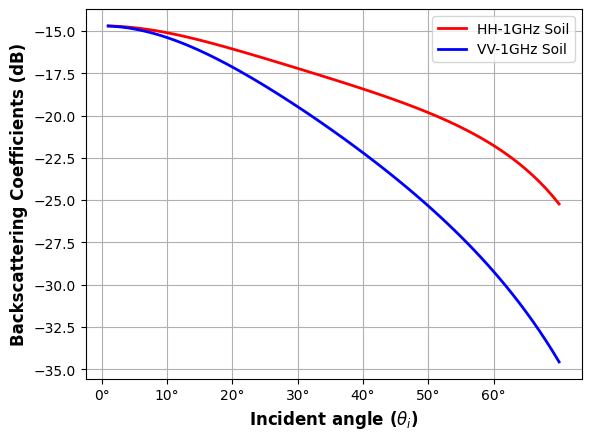

In [7]:
import numpy as np
from collections import defaultdict
from ssrt.surface import I2EM_Bistat_model
import matplotlib.pyplot as plt


# Example parameters
frqs = [1, 3, 5, ]           # GHz
rms_height = 0.01         # meters (2 mm)
correlation_length = 0.041  # meters (2 cm)
incidence_angle = np.arange(0, 71, 1)    # degrees

azimuth_angle = 180.0      # degrees (backscatter)
dielectric_constant = 5.1 - 1j * 1.  # complex dielectric constant (wet soil)
correlation_type = 1       # Exponential correlation function
xx_param = 2.0             # Parameter for correlation (only used if sp=3 or 4)


# Call the I2EM_Bistat_model function

VV, HH, HV, VH = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)

for f in frqs:
    for theta_i in incidence_angle:

        theta_s = theta_i

        # Call the model
        sigma_0_vv, sigma_0_hh, sigma_0_hv, sigma_0_vh = I2EM_Bistat_model(
            fr=f,
            sig=rms_height,
            L=correlation_length,
            thi=theta_i,
            ths=theta_s,
            phs=azimuth_angle,
            er=dielectric_constant,
            sp=correlation_type,
            xx=xx_param
        )

        VV[f].append(sigma_0_vv)
        HH[f].append(sigma_0_hh)
        HV[f].append(sigma_0_hv)
        VH[f].append(sigma_0_vh)

# Plotting results
plt.figure(2)
# Plotting HH and VV for each itype
plt.plot(incidence_angle, VV[1], color='r', linewidth=2, label='HH-1GHz Soil')
plt.plot(incidence_angle, HH[1], color='b', linewidth=2, label='VV-1GHz Soil')


# Customizing plot appearance
plt.grid(True)
plt.xticks(ticks=np.arange(0, 61, 10), labels=['0°', '10°', '20°', '30°', '40°', '50°', '60°'])
plt.xlabel(r'Incident angle ($\theta_i$)', fontsize=12, fontweight='bold')
plt.ylabel('Backscattering Coefficients (dB)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.show()
